In [1]:
import sys
sys.path.append("..")
sys.path.append("../dl")

import torch
import segmentation_models_pytorch as smp
from omegaconf import OmegaConf
from torch import nn

from config import user_conf, get_conf
from inferer import *
from lightning_model import *

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from 

In [2]:
model = smp.FPN(
    encoder_name="resnext50_32x4d",
    classes=2,
    decoder_merge_policy='cat'
)

config = get_conf(user_conf, "pannuke")
segmodel = SegModel.from_conf(model, config)
ckpt = segmodel.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
segmodel.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(segmodel, config)

In [4]:
infobj = inf.run()

Prediction for: Adrenal_gland_fold3_0
Prediction for: Adrenal_gland_fold3_1
Prediction for: Adrenal_gland_fold3_10
Prediction for: Adrenal_gland_fold3_100
Prediction for: Adrenal_gland_fold3_101
Prediction for: Adrenal_gland_fold3_102
Prediction for: Adrenal_gland_fold3_103
Prediction for: Adrenal_gland_fold3_104
Prediction for: Adrenal_gland_fold3_105
Prediction for: Adrenal_gland_fold3_106
Prediction for: Adrenal_gland_fold3_107
Prediction for: Adrenal_gland_fold3_108
Prediction for: Adrenal_gland_fold3_109
Prediction for: Adrenal_gland_fold3_11
Prediction for: Adrenal_gland_fold3_110
Prediction for: Adrenal_gland_fold3_111
Prediction for: Adrenal_gland_fold3_112
Prediction for: Adrenal_gland_fold3_113
Prediction for: Adrenal_gland_fold3_114
Prediction for: Adrenal_gland_fold3_115
Prediction for: Adrenal_gland_fold3_116
Prediction for: Adrenal_gland_fold3_117
Prediction for: Adrenal_gland_fold3_118
Prediction for: Adrenal_gland_fold3_119
Prediction for: Adrenal_gland_fold3_12
Predict

In [5]:
# inf.plot_histograms()

In [6]:
# inf.plot_predictions()

In [7]:
inf.post_process()

In [8]:
# inf.plot_segmentations()

In [9]:
score_df = inf.benchmark(save=True)
score_df

,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_Sensitivity,inst_Precision,splits,merges
Adrenal_gland_fold3_0_metrics,0.171314,0.171314,0.704912,0.172343,0.603199,0.285714,0.173913,0.8,0.0482705,1.14959
Adrenal_gland_fold3_1_metrics,0.111605,0.111605,0.588586,0.087779,0.497414,0.176471,0.103448,0.6,0.0474241,1.40712
Adrenal_gland_fold3_10_metrics,0.450396,0.450396,0.797859,0.406032,0.652551,0.622222,0.466667,0.933333,0.129961,1.06936
Adrenal_gland_fold3_100_metrics,0.402757,0.402757,0.801677,0.363746,0.636555,0.571428,0.5,0.666667,0.0835582,0.375532
Adrenal_gland_fold3_101_metrics,0.523135,0.523135,0.796263,0.47077,0.706155,0.666667,0.555555,0.833333,0.0627769,0.402394
...,...,...,...,...,...,...,...,...,...,...
Skin_avg,0.0294667,0.0294097,0.15792,0.0289855,0.116363,0.0522279,0.0342128,0.14276,0.0585789,1.76166
Stomach_avg,0.10806,0.107818,0.386644,0.0991452,0.336311,0.155301,0.11148,0.391458,0.0618083,1.57418
Testis_avg,0.0679459,0.0679091,0.356357,0.0748258,0.26393,0.125057,0.0821462,0.394067,0.271879,1.18841
Thyroid_avg,0.106296,0.106294,0.392756,0.10687,0.321664,0.171404,0.121704,0.380601,0.0839075,1.1634


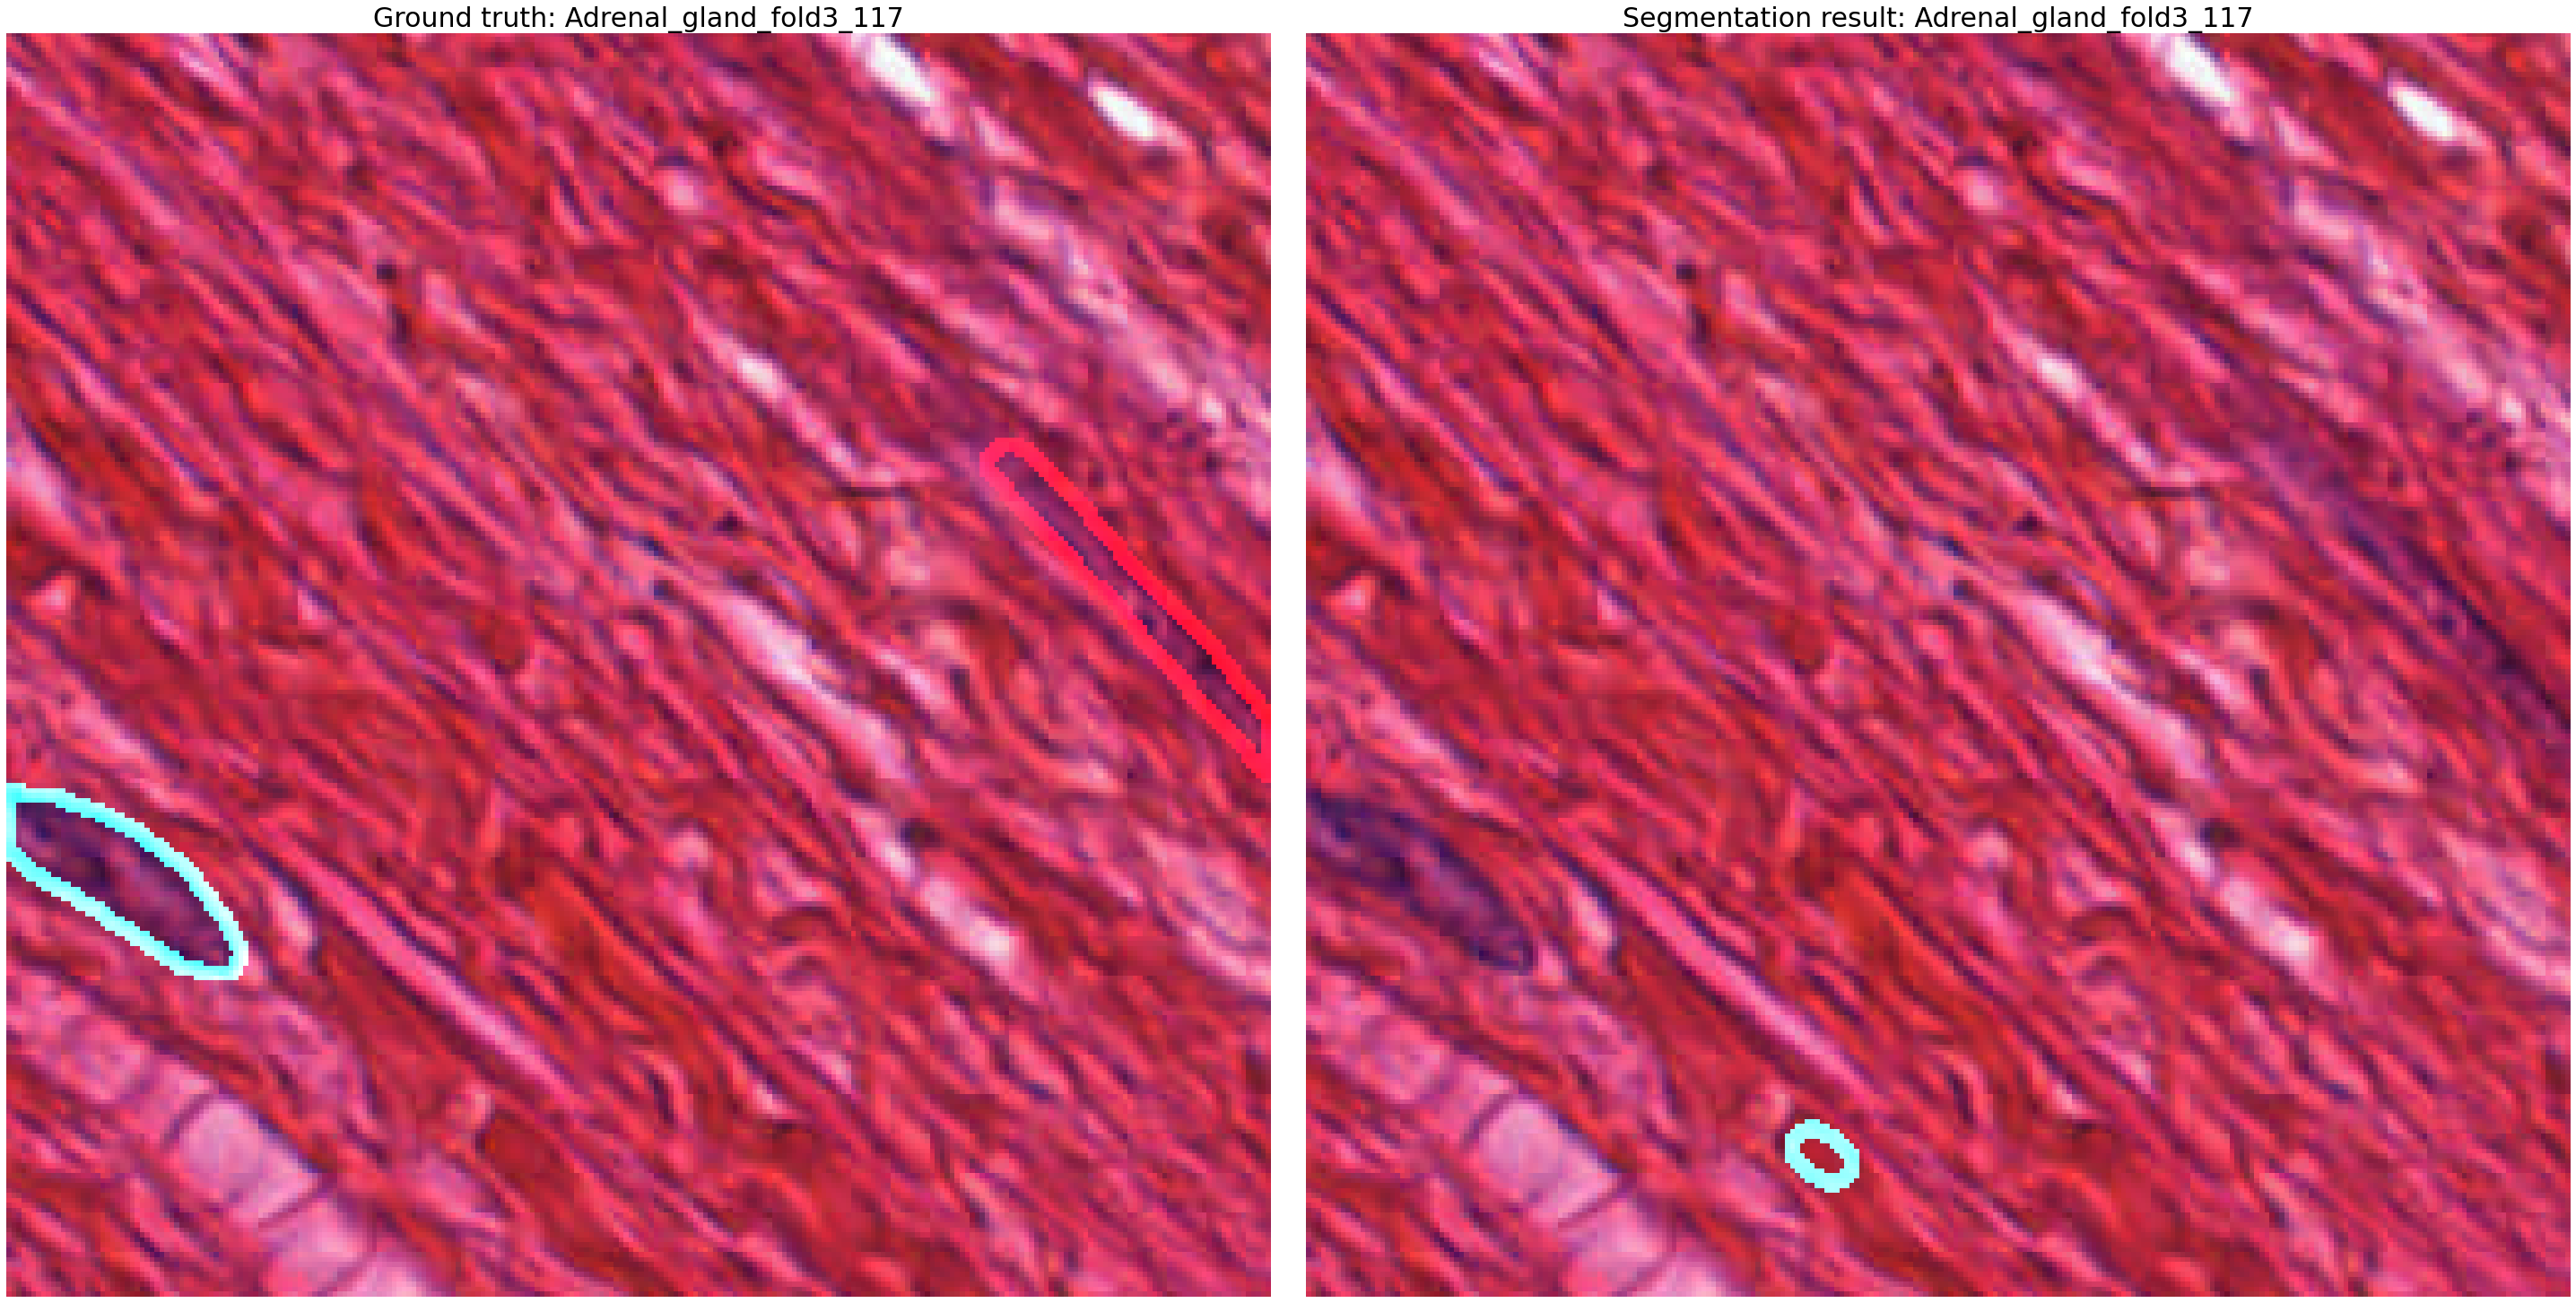

In [10]:
inf.plot_overlays(ixs=[21], save=False)